# Script to evaluate the ML-Models

Setup (load automl-models.pickle)

In [14]:
import pickle
import csv

with open(r"../app/_meta.csv") as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  list_qualities = list()
  for line in csv_reader:
    list_qualities.append(line[0])
  list_qualities = list_qualities[1:]

with open(r"../app/automl.pkl", "rb") as input_file:
  automl = pickle.load(input_file)

### Inspect the score:

In [15]:
automl.best_loss

0.370654086439158

In [26]:
automl.best_iteration

11095

Test with a random dataset:

In [16]:
import openml as oml

dataset = oml.datasets.get_dataset(12)

In [17]:
import pandas as pd

t = dict()

for quality in list_qualities:
  t[quality] = [dataset.qualities.get(quality)]
test_df = pd.DataFrame(t)

In [18]:
print(dict(zip(automl.classes_, automl.predict_proba(test_df)[0])))
print(automl.predict(test_df)[0])

{'ATM': 0.5320488084759794, 'AutoGluon': 0.005440963082630282, 'FLAML': 0.40600173450317156, 'H2O AutoML': 0.014511003325768159, 'Hyperopt-Sklearn': 0.007667888680881399, 'TPOT': 0.02480019895140548, 'TransmogrifAI': 0.0034334522959763264, 'auto-sklearn': 0.0060959506841874985}
ATM


In [11]:
import lightgbm as lgb
import matplotlib.pyplot as plt

https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.plot_importance.html

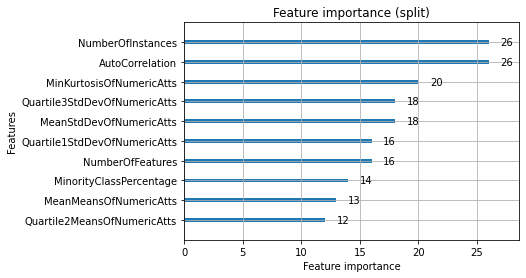

In [22]:
importance_type = 'split'
lgb.plot_importance(automl.model.estimator, max_num_features=10, importance_type=importance_type, title='Feature importance ({})'.format(importance_type))
plt.savefig('graphs/feature_importance.png', dpi=300)

https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.plot_tree.html#lightgbm.plot_tree

In [23]:
max_index = 191
index = 191
ax = lgb.create_tree_digraph(
  automl.model.estimator, 
  tree_index=index, 
  orientation='vertical', 
  name='Tree{}'.format(index))

ax.view()

'Tree191.gv.pdf'